In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(2)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X_train = mnist.train.images.reshape(-1, 28, 28, 1)
Y_train = mnist.train.labels
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)
X_test = mnist.test.images.reshape(-1, 28, 28, 1)
Y_test = mnist.test.labels

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Valid', 
                              activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Valid', 
                              activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation = 'relu'))
model.add(keras.layers.Dense(84, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               61560     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [7]:
batch_size = 32
epochs = 10
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [8]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[learning_rate_reduction])

Epoch 1/10
55000/55000 [==============================] - 30s 551us/step - loss: 0.9078 - acc: 0.6829
Epoch 2/10
55000/55000 [==============================] - 31s 561us/step - loss: 0.2980 - acc: 0.9073
Epoch 3/10
55000/55000 [==============================] - 31s 567us/step - loss: 0.2202 - acc: 0.9305
Epoch 4/10
55000/55000 [==============================] - 32s 573us/step - loss: 0.1801 - acc: 0.9428
Epoch 5/10
55000/55000 [==============================] - 31s 565us/step - loss: 0.1543 - acc: 0.9515
Epoch 6/10
55000/55000 [==============================] - 32s 578us/step - loss: 0.1342 - acc: 0.9571
Epoch 7/10
55000/55000 [==============================] - 31s 571us/step - loss: 0.1193 - acc: 0.9622
Epoch 8/10
55000/55000 [==============================] - 32s 579us/step - loss: 0.1095 - acc: 0.9655
Epoch 9/10
55000/55000 [==============================] - 31s 566us/step - loss: 0.1019 - acc: 0.9671
Epoch 10/10
55000/55000 [==============================] - 31s 569us/step - loss: 

In [9]:
model.evaluate(X_test, Y_test, batch_size=32)

10000/10000 [==============================] - 2s 230us/step


[0.09932954489355907, 0.9677]

In [10]:
predict = model.predict(X_test)

Predicted Result: 6


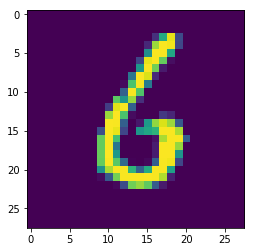

In [16]:
test_no = 50
plt.imshow(X_test[test_no][:,:,0])
print('Predicted Result: {}'.format(predict[test_no].argmax()))

In [12]:
model.save_weights('MNIST_weight.h5')
model.save('MNIST_model.h5')